# Ejercicio2

### Paso 1: Librerías y requerimientos

In [1]:
install.packages("xtable")
install.packages("hdm")
install.packages("glmnet")
install.packages("ggplot2")
install.packages("tidyr")

package 'xtable' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\PC\AppData\Local\Temp\RtmpyMnzV6\downloaded_packages


also installing the dependencies 'checkmate', 'Formula'




package 'checkmate' successfully unpacked and MD5 sums checked
package 'Formula' successfully unpacked and MD5 sums checked
package 'hdm' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\PC\AppData\Local\Temp\RtmpyMnzV6\downloaded_packages
package 'glmnet' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\PC\AppData\Local\Temp\RtmpyMnzV6\downloaded_packages


also installing the dependency 'S7'




package 'S7' successfully unpacked and MD5 sums checked
package 'ggplot2' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\PC\AppData\Local\Temp\RtmpyMnzV6\downloaded_packages
package 'tidyr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\PC\AppData\Local\Temp\RtmpyMnzV6\downloaded_packages


In [13]:
library(hdm)
library(xtable)
library(glmnet)
library(ggplot2)
set.seed(12092024)
library(readxl)
library(tidyr)
library(dplyr)





### Paso 2: Leer la data y quedarnos con aquiellos sin missnig values

In [5]:
df <- read_excel("../input/Districtwise_literacy_rates.xlsx", sheet = 1)
df <- na.omit(df)
head(df, 5)
dim(df)

STATCD,DISTCD,STATNAME,DISTNAME,DISTRICTS,BLOCKS,VILLAGES,TOTPOPULAT,P_URB_POP,POPULATION_0_6,⋯,CLS5,CLS6,CLS7,TCH1,TCH2,TCH3,TCH4,TCH5,TCH6,TCH7
<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,101,JAMMU & KASHMIR,KUPWARA,1,13,391,875564,11.33,197001.90,⋯,23,852,239,2708,5205,43,70,28,1065,638
1,102,JAMMU & KASHMIR,BARAMULA,1,18,678,1015503,17.19,161871.18,⋯,30,1665,360,2937,5873,236,60,105,2533,964
1,103,JAMMU & KASHMIR,SRINAGAR,1,8,94,1269751,98.73,155798.45,⋯,0,2873,40,828,3647,1159,14,0,4757,129
1,104,JAMMU & KASHMIR,BADGAM,1,13,523,735753,11.74,150755.79,⋯,8,1035,325,1878,3892,250,68,19,1493,716
1,105,JAMMU & KASHMIR,PULWAMA,1,8,359,570060,13.80,97651.28,⋯,5,1101,209,1336,2682,113,90,38,1414,506


[1] 625 100

### Paso 3: Histograma del literaacity hombres y Literacity mujeres

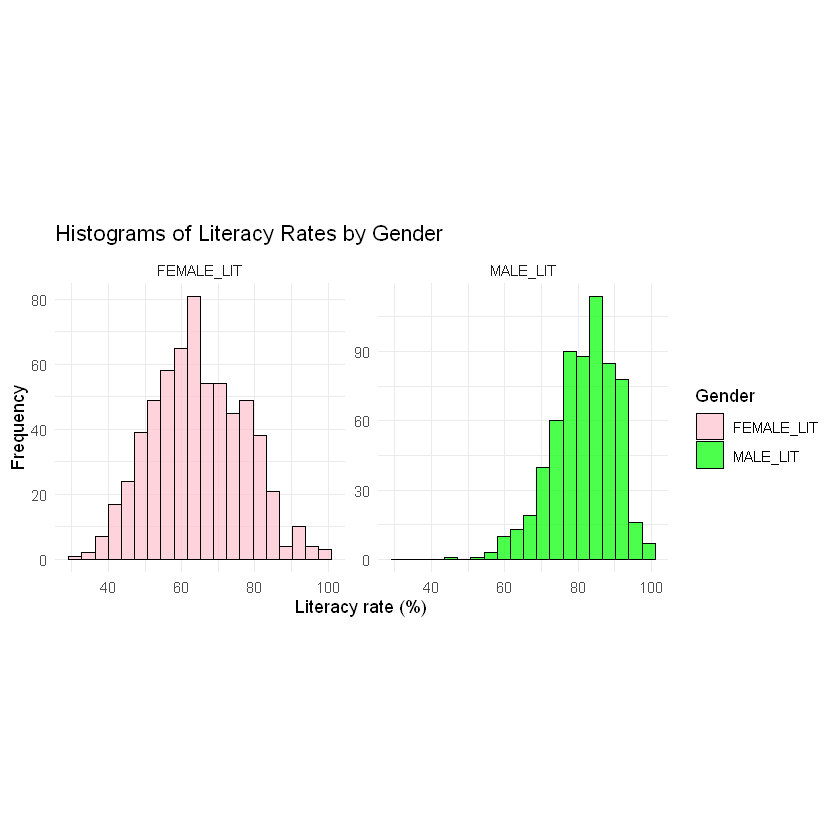

In [ ]:
df_long <- df %>%
  select(FEMALE_LIT, MALE_LIT) %>%
  pivot_longer(cols = everything(),
               names_to = "Gender",
               values_to = "Literacy")

# Dos histogramas uno al costado del otro
ggplot(df_long, aes(x = Literacy, fill = Gender)) +
  geom_histogram(bins = 20, alpha = 0.7, color = "black") +
  facet_wrap(~Gender, ncol = 2, scales = "free_y") +
  labs(title = "Histograms of Literacy Rates by Gender",
       x = "Literacy rate (%)",
       y = "Frequency") +
  scale_fill_manual(values = c("FEMALE_LIT" = "pink", "MALE_LIT" = "green")) +
  theme_minimal() +
  theme(aspect.ratio = 3/3)   

##### En este caso se ve claramente que la tasa de alfabetización en promedio tiene una distribución con una media centrada alrededor de 80 en los hombres y de 60 en las mujeres, siendo además en el caso femenino una distribución con cola a la izquierda y con la mayor cantidad de observaciones hacia valores más bajos. Esto contrasta con la distribución masculina, más concentrada y en niveles más elevados. Todo ello refleja la brecha de género que sigue existiendo en ese país respecto a la tasa de alfabetización, la cual probablemente se manifieste también en muchas otras áreas.

### Paso 4: Estimación de una especificación de baja dimensión y cálculo del 𝑅2 en el set de prueba